<a href="https://colab.research.google.com/github/95/combatSystem/blob/main/carclass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install tensorflow matplotlib


In [11]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/archive (8).zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
# Importing necessary libraries
import os
import tensorflow as tf  # The core open-source library to help you develop and train ML models.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Image processing and augmentation
import matplotlib.pyplot as plt  # For plotting graphs and visualizing results


In [13]:
# Define the directory paths for the train, test, and validation datasets
train_dir = '/tmp/train'
val_dir = '/tmp/val'
test_dir = '/tmp/test'


In [14]:
# Define ImageDataGenerator instances for train, validation, and test datasets.
# ImageDataGenerator is used for Data Augmentation (creating variations of the image to improve model generalization) and scaling.

# For the training data, we apply various augmentation techniques to artificially increase the diversity of the dataset.
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1.
    rotation_range=20,  # Degree range for random rotations.
    width_shift_range=0.2,  # Range for horizontal shift.
    height_shift_range=0.2,  # Range for vertical shift.
    shear_range=0.2,  # Shear Intensity.
    zoom_range=0.2,  # Range for random zoom.
    horizontal_flip=True,  # Randomly flip inputs horizontally.
    fill_mode='nearest'  # Points outside the boundaries are filled according to the given mode.
)

# For validation and test data, we only rescale the pixel values. We do not need to augment this data.
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
# Define the batch size, which represents the number of samples that will be propagated through the network.
batch_size = 32

# Setup generators to read images from the dataset directory and feed them to the neural network.
# The generators will convert the images to float32 tensors, rescale the pixel values, and will yield batches of images and labels.
train_generator = train_datagen.flow_from_directory(
    train_dir,  # directory for training images
    target_size=(150, 150),  # all images will be resized to 150x150
    batch_size=batch_size,
    class_mode='categorical'  # We have more than two classes so we use 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [ ]:
# Define the model structure.
model = tf.keras.models.Sequential([
    # The first convolution layer will learn 32 filters. Each filter transforms a part of the image as defined by the kernel size (3, 3).
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # After each conv layer, we add a max pooling layer to reduce the spatial dimensions of the output volume, which helps reduce computation.
    tf.keras.layers.MaxPooling2D(2, 2),
    # Adding more convolution layers to allow the network to learn more complex patterns.
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flattening the 2D matrix data to a vector
    tf.keras.layers.Flatten(),
    # Adding dense layers for classification.
    tf.keras.layers.Dense(512, activation='relu'),
    # The output layer has 15 nodes (for 15 colors) and softmax activation to output probabilities.
    tf.keras.layers.Dense(15, activation='softmax')
])


In [ ]:
# Compile the model to configure the learning process.
model.compile(
    loss='categorical_crossentropy',  # Suitable loss for multi-class classification
    optimizer='adam',  # Adam optimization algorithm to adjust weights to minimize the loss.
    metrics=['accuracy']  # We want to track accuracy during the training.
)


In [ ]:
# Train the model using the train and validation datasets.
history = model.fit(
    train_generator,
    epochs=25,  # The number of iterations over the entire dataset.
    validation_data=val_generator  # Providing validation data to evaluate the model at the end of each epoch.
)


Epoch 1/25
228/228 [==============================] - 73s 267ms/step - loss: 1.4335 - accuracy: 0.5280 - val_loss: 0.8710 - val_accuracy: 0.7039
Epoch 2/25
228/228 [==============================] - 61s 268ms/step - loss: 0.9376 - accuracy: 0.6686 - val_loss: 0.8032 - val_accuracy: 0.7103
Epoch 3/25
228/228 [==============================] - 58s 255ms/step - loss: 0.8258 - accuracy: 0.7073 - val_loss: 0.6679 - val_accuracy: 0.7581
Epoch 4/25
228/228 [==============================] - 60s 261ms/step - loss: 0.7694 - accuracy: 0.7271 - val_loss: 0.6613 - val_accuracy: 0.7574
Epoch 5/25
228/228 [==============================] - 58s 253ms/step - loss: 0.7167 - accuracy: 0.7435 - val_loss: 0.6099 - val_accuracy: 0.7723
Epoch 6/25
228/228 [==============================] - 59s 259ms/step - loss: 0.6963 - accuracy: 0.7529 - val_loss: 0.6584 - val_accuracy: 0.7723
Epoch 7/25
228/228 [==============================] - 58s 253ms/step - loss: 0.6847 - accuracy: 0.7586 - val_loss: 0.6260 - val_ac

In [19]:
# Evaluate the model using the test dataset to check its performance.
model.evaluate(test_generator)


49/49 [==============================] - 6s 124ms/step - loss: 0.5679 - accuracy: 0.8130


[0.5678828358650208, 0.8129820227622986]

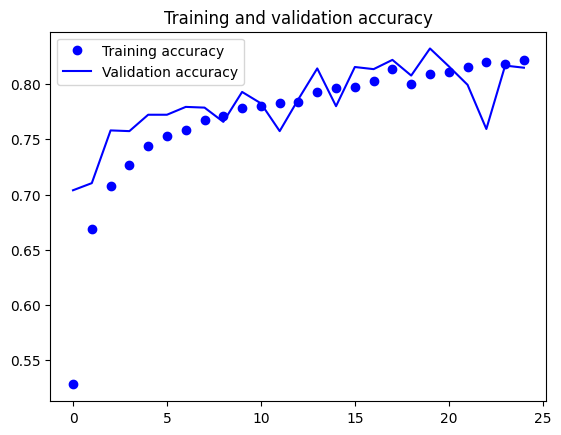

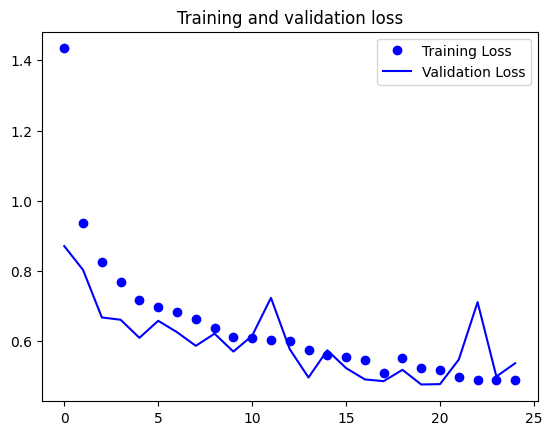

In [ ]:
# Extracting the history of accuracy and loss during training to plot and visualize the training process.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('/content/drive/My Drive/MyModels/my_model.h5')


In [17]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/MyModels/my_model.h5')
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image file, resizing it to 150x150 pixels (the input shape your model expects)
img_path = '/content/drive/MyDrive/beige.png'  # replace with the path of your image
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array, and add an extra dimension
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Scale the pixel values to [0, 1]
img_array /= 255.

# Use the model to make a prediction on the input image
predictions = model.predict(img_array)

# Decode the prediction into a readable result
predicted_class_idx = np.argmax(predictions[0])
mapping_dict = train_generator.class_indices  # assuming train_generator is in memory
class_labels = list(mapping_dict.keys())
predicted_class_label = class_labels[predicted_class_idx]

print(f'The model predict s that the color of the car in the image is: {predicted_class_label}')


1/1 [==============================] - 0s 72ms/step
The model predict s that the color of the car in the image is: tan


In [18]:
# Use the trained model to predict the class labels (car colors) for the test dataset.
predictions = model.predict(test_generator)


49/49 [==============================] - 4s 78ms/step
